<h1>Exercise 4 </h1>

<p>Aditya Iqbal Bagaskara</p>

<h2>Importing libraries and define functions </h2>

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from random import random, randint, choice
from random import choice
from skimage.transform import resize
from scipy.stats import multivariate_normal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D
from keras.optimizers import SGD
from keras import Input

def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding="latin1")
    return dict

def class_acc(pred, gt):
    correctAnswer = 0
    correctLabel = []
    for i in range(0, len(pred)):
        if(label_names[pred[i]] == label_names[gt[i]]):
            correctLabel = np.append(correctLabel, label_names[gt[i]])
            corectAnswer = correctAnswer + 1
    
    accuracy = len(correctLabel)/len(gt)
    return accuracy

def merge(dict1, dict2):
    return(dict2.update(dict1))


Using TensorFlow backend.


<h2> Load the Training Data and Test Data </h2>



In [3]:
from collections import defaultdict
datadict = unpickle('cifar-10-batches-py/data_batch_1')
datadict2 = unpickle('cifar-10-batches-py/data_batch_2')
datadict3 = unpickle('cifar-10-batches-py/data_batch_3')
datadict4 = unpickle('cifar-10-batches-py/data_batch_4')
datadict5 = unpickle('cifar-10-batches-py/data_batch_5')
datadict_test = unpickle('cifar-10-batches-py/test_batch')

dd = defaultdict(list)

for d in (datadict, datadict2, datadict3, datadict4, datadict5): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)
        
X_train = dd["data"]
Y_train = dd["labels"]


X_train = np.concatenate((dd["data"][0],dd["data"][1],dd["data"][2],dd["data"][3],dd["data"][4]), axis=0)
Y_train = np.concatenate((dd["labels"][0],dd["labels"][1],dd["labels"][2],dd["labels"][3],dd["labels"][4]), axis=0)


X_test = datadict_test["data"]
Y_test = datadict_test["labels"]


labeldict = unpickle('cifar-10-batches-py/batches.meta')
label_names = labeldict["label_names"]

X_train = X_train.reshape(len(X_train), 3, 32, 32).transpose(0,2,3,1).astype("int64")
X_test = X_test.reshape(len(X_test), 3, 32, 32).transpose(0,2,3,1).astype("int64")

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [4]:
Y_train_1h = np.zeros((len(Y_train),10))
Y_test_1h = np.zeros((len(Y_test),10))

for i in range(0,len(Y_train)):
    color_encode = np.zeros(10)
    color_encode[int(Y_train[i])] = 1
    Y_train_1h[i] = color_encode

for i in range(0,len(Y_test)):
    color_encode = np.zeros(10)
    color_encode[int(Y_test[i])] = 1
    Y_test_1h[i] = color_encode




In [5]:
num_training = len(X_train)
num_test = len(X_test)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

X_train_1 = np.reshape(X_train,(num_training,3072))/255
X_test_1 = np.reshape(X_test,(num_test,3072))/255


<h3>Model dense 1 </h3>

In [78]:
model_1 = Sequential()
model_1.add(Dense(5, input_dim=3072, activation='sigmoid'))
model_1.add(Dense(300, input_dim=3072, activation='sigmoid'))
model_1.add(Dense(10, input_dim=3072, activation='sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
num_of_epochs = 30

model_1.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [79]:
tr_hist_1 = model_1.fit(X_train_1,Y_train_1h, epochs=num_of_epochs, batch_size=32, verbose=1)

Epoch 1/30
50000/50000 [==============================] - 9s 172us/step - loss: 2.3033 - accuracy: 0.1027
Epoch 2/30
50000/50000 [==============================] - 8s 156us/step - loss: 2.2726 - accuracy: 0.1212
Epoch 3/30
50000/50000 [==============================] - 8s 162us/step - loss: 2.0391 - accuracy: 0.2174
Epoch 4/30
50000/50000 [==============================] - 8s 153us/step - loss: 1.9378 - accuracy: 0.2746
Epoch 5/30
50000/50000 [==============================] - 8s 156us/step - loss: 1.8910 - accuracy: 0.3011
Epoch 6/30
50000/50000 [==============================] - 8s 155us/step - loss: 1.8631 - accuracy: 0.3153
Epoch 7/30
50000/50000 [==============================] - 8s 164us/step - loss: 1.8477 - accuracy: 0.3229
Epoch 8/30
50000/50000 [==============================] - 8s 164us/step - loss: 1.8345 - accuracy: 0.3284
Epoch 9/30
50000/50000 [==============================] - 8s 166us/step - loss: 1.8208 - accuracy: 0.3357
Epoch 10/30
50000/50000 [=====================

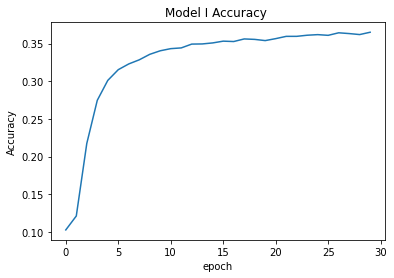

In [80]:
plt.plot(tr_hist_1.history['accuracy'])
plt.title('Model I Accuracy ')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

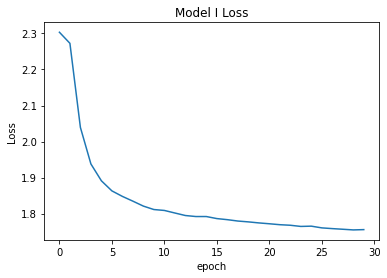

In [81]:
plt.plot(tr_hist_1.history['loss'])
plt.title('Model I Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [82]:
acc = model_1.evaluate(X_test_1, Y_test_1h, batch_size=128, verbose=0)
print(model_1.metrics_names)
print(acc)

['loss', 'accuracy']
[1.7989103275299072, 0.34860000014305115]


In [83]:
print(f'The accuracy of model 1 is {acc[1]*100}%')

The accuracy of model 1 is 34.860000014305115%


In [84]:
print(model_1.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 5)                 15365     
_________________________________________________________________
dense_22 (Dense)             (None, 300)               1800      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                3010      
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________
None


<h3>Model Dense 2

In [85]:
model_2 = Sequential()
model_2.add(Dense(100, input_dim=3072, activation='sigmoid'))
model_2.add(Dense(50, input_dim=3072, activation='sigmoid'))
model_2.add(Dense(10, input_dim=3072, activation='sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
num_of_epochs = 30

model_2.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [87]:
tr_hist_2 = model_2.fit(X_train_1,Y_train_1h, epochs=num_of_epochs, batch_size=32, verbose=1)

Epoch 1/30
50000/50000 [==============================] - 22s 443us/step - loss: 2.0599 - accuracy: 0.2405
Epoch 2/30
50000/50000 [==============================] - 15s 302us/step - loss: 1.8164 - accuracy: 0.3501
Epoch 3/30
50000/50000 [==============================] - 15s 308us/step - loss: 1.7114 - accuracy: 0.3854
Epoch 4/30
50000/50000 [==============================] - 15s 310us/step - loss: 1.6404 - accuracy: 0.4121
Epoch 5/30
50000/50000 [==============================] - 16s 315us/step - loss: 1.5837 - accuracy: 0.4345
Epoch 6/30
50000/50000 [==============================] - 17s 349us/step - loss: 1.5388 - accuracy: 0.4473
Epoch 7/30
50000/50000 [==============================] - 16s 315us/step - loss: 1.5039 - accuracy: 0.4620
Epoch 8/30
50000/50000 [==============================] - 15s 292us/step - loss: 1.4755 - accuracy: 0.4736
Epoch 9/30
50000/50000 [==============================] - 16s 328us/step - loss: 1.4505 - accuracy: 0.4829
Epoch 10/30
50000/50000 [============

In [92]:
acc_2 = model_2.evaluate(X_test_1, Y_test_1h, batch_size=128, verbose=0)
print(model_2.metrics_names)
print(acc_2)
print(f'The accuracy of model II is {acc_2[1]*100}%')

['loss', 'accuracy']
[1.382735107421875, 0.5131999850273132]
The accuracy of model II is 51.31999850273132%


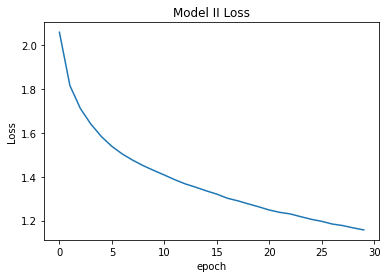

In [91]:
plt.plot(tr_hist_2.history['loss'])
plt.title('Model II Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

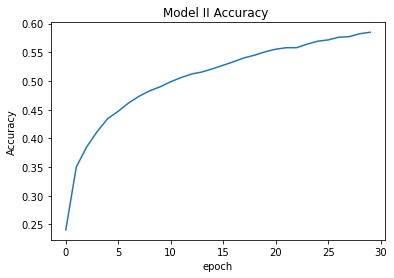

In [90]:
plt.plot(tr_hist_2.history['accuracy'])
plt.title('Model II Accuracy ')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

<h2>Model with convulutional layer </h2>

In [35]:
model_3 = Sequential()


model_3.add(Dense(5, input_shape=(32,32,3), activation='sigmoid'))
model_3.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_3.add(keras.layers.MaxPooling2D((2, 2)))
model_3.add(keras.layers.Dropout(0.4))
model_3.add(keras.layers.Flatten())
model_3.add(Dense(200, activation='relu', kernel_initializer='he_uniform'))
model_3.add(Dense(10, activation='sigmoid'))
sgd = SGD(lr=0.01)
num_of_epochs = 10
model_3.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
print(model_3.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32, 32, 5)         20        
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 30, 30, 64)        2944      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 200)             

In [37]:
tr_hist_3 = model_3.fit(X_train,Y_train_1h, epochs=num_of_epochs, batch_size=32, verbose=1)

Epoch 1/10
50000/50000 [==============================] - 157s 3ms/step - loss: 2.1594 - accuracy: 0.1907
Epoch 2/10
50000/50000 [==============================] - 166s 3ms/step - loss: 1.9217 - accuracy: 0.2960
Epoch 3/10
50000/50000 [==============================] - 170s 3ms/step - loss: 1.8426 - accuracy: 0.3284
Epoch 4/10
50000/50000 [==============================] - 171s 3ms/step - loss: 1.7927 - accuracy: 0.3483
Epoch 5/10
50000/50000 [==============================] - 170s 3ms/step - loss: 1.7494 - accuracy: 0.3666
Epoch 6/10
50000/50000 [==============================] - 153s 3ms/step - loss: 1.7095 - accuracy: 0.3833
Epoch 7/10
50000/50000 [==============================] - 148s 3ms/step - loss: 1.6713 - accuracy: 0.3980
Epoch 8/10
50000/50000 [==============================] - 146s 3ms/step - loss: 1.6328 - accuracy: 0.4153
Epoch 9/10
50000/50000 [==============================] - 182s 4ms/step - loss: 1.6000 - accuracy: 0.4249
Epoch 10/10
50000/50000 [=====================

In [38]:
acc_3 = model_3.evaluate(X_test, Y_test_1h, batch_size=128, verbose=0)
print(model_3.metrics_names)
print(acc_3)
print(f'The accuracy of model III is {acc_3[1]*100}%')

['loss', 'accuracy']
[1.5949595392227174, 0.4339999854564667]
The accuracy of model III is 43.39999854564667%


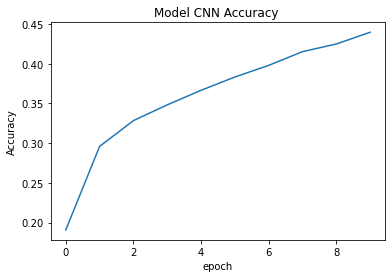

In [39]:
plt.plot(tr_hist_3.history['accuracy'])
plt.title('Model CNN Accuracy ')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

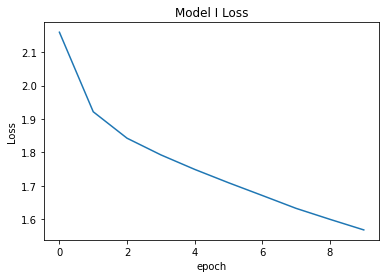

In [40]:
plt.plot(tr_hist_3.history['loss'])
plt.title('Model I Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

<h4>1-NN classifier </h4>

 <ul>
         <li>The accuracy of 1-NN Classifier: 38.59% </li>


 </ul>

    
<br>    


<h4>Bayes classifier </h4>

 <ul>
         <li>Task 1: 19.5%  </li>
         <li>Task 2: 24.5% </li>

 </ul>


<p> The accuracy for task 2 is slightly higher than task 1 
since we are trying to find the correlation between those RGB colors.
Providing covariane matrices as parameter can explains the relation between those values better
in terms of their existence with other colors (for example to construct another color) rather than 
like the first classification when we just do each color independently </p>



<br>

<h4>Neural network</h4>


 
 <ul>
         <li>Model 1: 34.86% </li>
         <li>Model 2: 51.32% </li>
         <li>Model 3: 43.40%</li>
      </ul>
      
      
<p> The model II from our neural network achieved the highest accuracy from all of our classifiers </p>

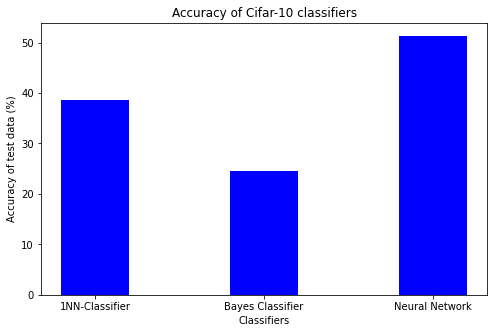

In [9]:
import matplotlib.pyplot as plt
data = {'1NN-Classifier':38.6, 'Bayes Classifier':24.5, 'Neural Network':51.32}
classifier = list(data.keys())
acc = list(data.values())
  
fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(classifier, acc, color ='blue',
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracy of test data (%)")
plt.title("Accuracy of Cifar-10 classifiers")
plt.show()